In [65]:
# Initial run of titanic project; simple knn and logreg models with zero
# data wrangling. Both models were visualized for accuracy rate

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from sklearn import metrics

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [66]:
#load data
train = pd.read_csv ('/Users/jusuki/Desktop/python projects/Kaggle submissions/kaggle_titanic/titanic_data/train.csv')
test = pd.read_csv('/Users/jusuki/Desktop/python projects/Kaggle submissions/kaggle_titanic/titanic_data/test.csv')

train.shape, test.shape

((891, 12), (418, 11))

In [19]:
#shown on youtube, but we will extend features to all 
feature_cols = ['Pclass','Parch']

In [34]:
X = train.loc[:,feature_cols]
X.shape

(891, 2)

In [35]:
y = train.Survived

In [32]:
#X_train = train.loc[:,feature_cols]
#Y_train = train['Survived']
#X_test  = test.loc[:,feature_cols]
#X_train.shape, Y_train.shape, X_test.shape

In [44]:
logreg = LogisticRegression()
logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
X_new = test.loc[:,feature_cols]

In [60]:
y_pred = logreg.predict(X_new)

In [61]:
pd.DataFrame({'PassengerId':test.PassengerId, 'Survived':y_pred}).set_index('PassengerId').to_csv('sub.csv')

In [62]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)


In [63]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.7310924369747899


Text(0, 0.5, 'Testing Accuracy')

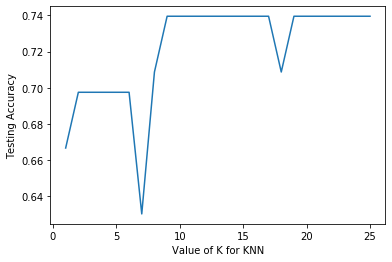

In [68]:
# try K=1 through K=25 and record testing accuracy for knn model
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# We can observe that accuracy is at highest 74% at k=11 first

Text(0, 0.5, 'Frequency')

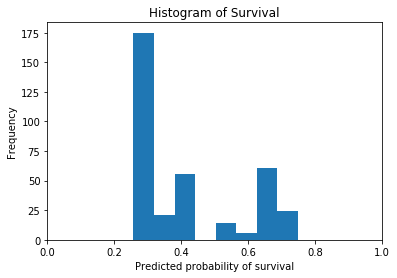

In [69]:
#visualizing logreg eval
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of Survival')
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [59]:
# simulate splitting a dataset of 25 observations into 5 folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False).split(range(25))

# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], str(data[1])))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


Text(0, 0.5, 'Testing Accuracy')

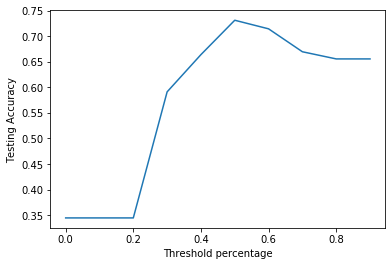

In [106]:
# predict survival if the predicted probability is greater than 0.5 (default)
from sklearn.preprocessing import binarize
import numpy
scores_threshold = []
t_range = list(numpy.arange(0,1,0.1))

for t in t_range:
    y_pred_class = binarize([y_pred_prob], t)[0]
    scores_threshold.append(metrics.accuracy_score(y_test, y_pred_class))

# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between threshold and testing accuracy
plt.plot(t_range, scores_threshold)
plt.xlabel('Threshold percentage')
plt.ylabel('Testing Accuracy')


In [72]:
#import cross_val_score
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=3)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.6476154806491884
0.6903121098626717


In [75]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

69.29

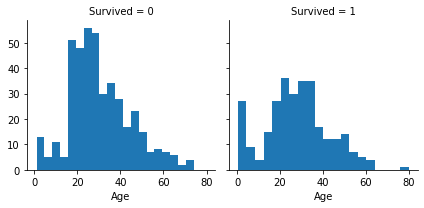

In [121]:
import seaborn as sns

g = sns.FacetGrid(train
                , col='Survived')
g.map(plt.hist, 'Age', bins=20)